## Produce the deprojected distance to galactic centre maps.

We'll use the fits from Patricio et al 2018 and 2019

In [14]:
# For prettiness
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

%matplotlib notebook
import matplotlib.pylab as plt

from astropy.io import fits
import numpy as np

# Import FRApy
from frapy import Observation,Metallicity_Gradient,fit_model,make_input_parameters,Output

### AS1063

In [2]:
obs = Observation(z=0.611,
                  data_path='../Data/MUSE/AS1063_metallicity.fits',
                  unc_path=None,
                  seeing = 1.03/0.2)

<IPython.core.display.Javascript object>


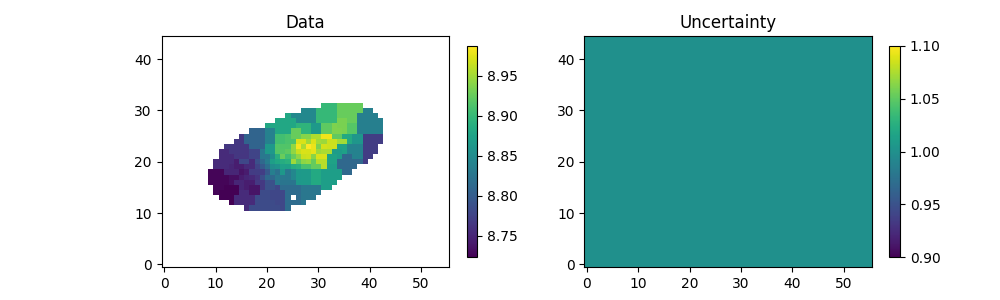

In [3]:
obs.plot()

In [4]:
model = Metallicity_Gradient(zlens=0.348,
                            dfx_path='../Data/LensigStuff/AS1063/AS1063_dplx.fits',
                            dfy_path='../Data/LensigStuff/AS1063/AS1063_dply.fits')

In [5]:
model.create_projection_maps(obs,correct_z=False)

In [6]:
# Parameters from all free Patricio 2019
model.cx = 29.9745
model.cy = 23.9830
model.q = 0.5148
model.pa = 67.8654
model.z_grad = -0.0416
model.z_0 = 9.037

more_sensible_model = model.make_model()

<IPython.core.display.Javascript object>


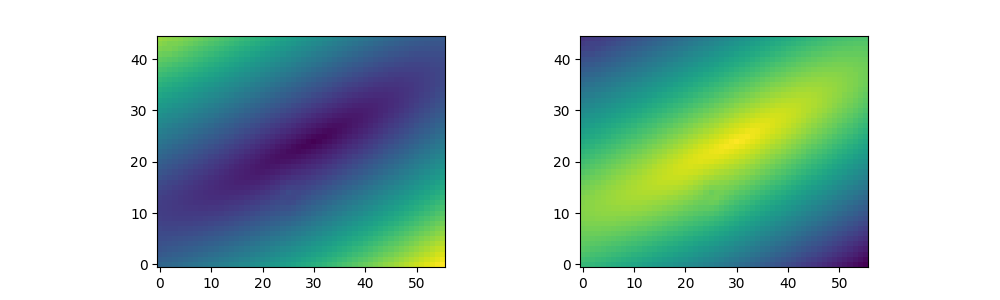

In [11]:
dist = model.make_distance_map()
grad = model.make_model()

fig, ax = plt.subplots(1,2,figsize=(10,3))
ax[0].imshow(dist,origin='lower')
ax[1].imshow(grad,origin='lower')

fits.writeto('AS1063_deprojected_galactic_centre_distance.fits',data=dist,header=obs.header,overwrite=True)

## M1206

I can use directly the one that I produced for the 1D analysis

## A521

In [40]:
obs = Observation(z=1.03,
                  data_path='../Data/MUSE/Im_A521_OII_ContSub_CMSub.fits',
                  unc_path=None,
                  seeing = 0.57/0.2)

In [47]:
model = Metallicity_Gradient(zlens=0.247,
                            dfx_path='../Data/LensigStuff/A521/A521_dplx.fits',
                            dfy_path='../Data/LensigStuff/A521/A521_dply.fits')

In [48]:
model.create_projection_maps(obs,correct_z=False)

In [49]:
# Parameters from all free Patricio 2018. Only centre and inclination are important
# inclination = 32 degrees -> q = b/a ratio.
# cos(inclination) = b/a = q.
#np.cos(32.5 * np.pi/180) =  0.8433914458128857
model.cx = 21
model.cy = 59
model.q = np.cos(32.5 * np.pi/180)
model.pa = 99
model.z_grad = 99 
model.z_0 = 99

more_sensible_model = model.make_model()

<IPython.core.display.Javascript object>


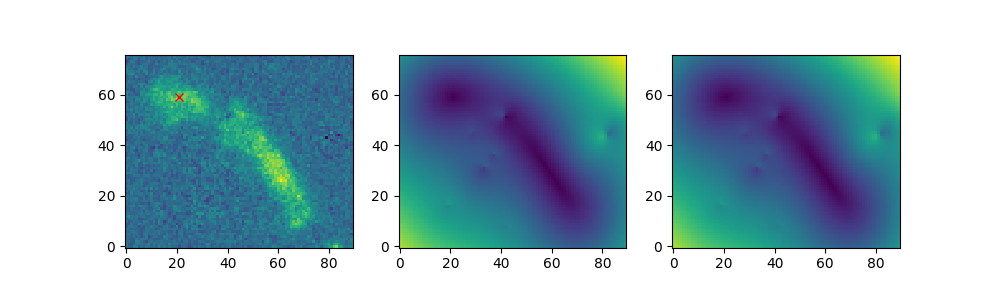

In [51]:
dist = model.make_distance_map()
grad = model.make_model()

fig, ax = plt.subplots(1,3,figsize=(10,3))
ax[0].imshow(obs.data,origin='lower')
ax[0].plot(21,59,marker='x',color='red')
ax[1].imshow(dist,origin='lower')
ax[2].imshow(grad,origin='lower')

fits.writeto('A521_deprojected_galactic_centre_distance.fits',data=dist,header=obs.header,overwrite=True)